# Analise Gestão de Talento

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ler o arquivo de dados
data = pd.read_excel('Base_PY_2022_2_v2.xlsx')

In [4]:
data.head(5)

,nome_funcionario,Cargo,nivel,desc_genero,desc_cor,desc_pcd,UF,num_idade,num_tempo_casa,flag_socio,...,Clas_Geracao,Flag_Lider,Genero_Lider,Pessoa_Posicao_Chave,Macro_Area,Area_N2,Empresa,Alta_Perfomance_Persona,Alta_Performance_Performance,Alta_Performance_Chave
0,Matheus Wesley Dos Santos Polo,desenv back end iii,Analista III,Masculino,PARDA,NÃO,PR,27,20,Sim,...,Y,Não,Masculino,Não,UN Cartões,TECH CARTOES,NEON PAGAMENTOS S.A.,1,1,0
1,Luiza Carlos E Castro Santos,anl engaj e exp i,Analista I,Feminino,BRANCA,NÃO,SP,20,21,Não,...,Z,Não,Masculino,Não,CdE de Team & Customer Experience (TeamX),TeamX,NEON PAGAMENTOS S.A.,0,0,0
2,Otavio Martins Salomao,coord back end,Coordenação,Masculino,PARDA,NÃO,SP,36,33,Sim,...,Y,Sim,Masculino,Não,UN Core Banking,Tech Core Banking e Clientes Internos,NEON PAGAMENTOS S.A.,0,0,0
3,Joyce Martins Romano,head cobranca,Head,Feminino,BRANCA,NÃO,SP,40,15,Sim,...,X,Sim,Masculino,Sim,CdE de Riscos,COBRANCA,NEON PAGAMENTOS S.A.,0,0,1
4,Ana Da Conceicao Zacarias,anl melhoria detec i,Analista I,Feminino,PRETA,NÃO,SP,31,40,Não,...,Y,Não,Masculino,Não,CdE de Riscos,PREV FRAUDE,NEON PAGAMENTOS S.A.,0,0,0


In [5]:
data.drop (['Cargo','conceito_2022_01','conceito_2021_02','conceito_2021_01','UF', 'Merito', 'Promo','Empresa', 'nivel', 'Class_nivel', 'Macro_Area', 'Area_N2', 'Clas_Geracao', 'nome_funcionario'],axis=1,inplace=True)

In [6]:
data.dtypes

desc_genero                      object
desc_cor                         object
desc_pcd                         object
num_idade                         int64
num_tempo_casa                    int64
flag_socio                       object
val_salario                     float64
perc_Faixa                      float64
Faixa                            object
Merito_Promo18m                   int64
Clas_temp_casa                   object
Class_Nivel2                     object
Clas_Raca_Cor                    object
Flag_Lider                       object
Genero_Lider                     object
Pessoa_Posicao_Chave             object
Alta_Perfomance_Persona           int64
Alta_Performance_Performance      int64
Alta_Performance_Chave            int64
dtype: object

In [7]:
# Selecionar o campo chave
campo_chave = 'nome_funcionario'

In [8]:
# Tratamento dos dados

# Quebra variaveis categoricas em multiplas 1 e 0
#sexo de um homem vira sexo_masculino=1 e sexo_feminino=0
data = pd.get_dummies(data)

# Cria dummies para as colunas categoricas 
#dummies = pd.get_dummies(data[['desc_genero', 'nivel']]) 



#conserta nomes das colunas
#data = clean_columns(data)

# Visão das primeiras linhas da tabela
#dummies.head(5)

In [9]:
data.head(5)

,num_idade,num_tempo_casa,val_salario,perc_Faixa,Merito_Promo18m,Alta_Perfomance_Persona,Alta_Performance_Performance,Alta_Performance_Chave,desc_genero_Feminino,desc_genero_Masculino,...,Class_Nivel2_SPV e Acima,Clas_Raca_Cor_Brancos e Amarelos,Clas_Raca_Cor_Não Informados,Clas_Raca_Cor_Pretos e Pardos,Flag_Lider_Não,Flag_Lider_Sim,Genero_Lider_Feminino,Genero_Lider_Masculino,Pessoa_Posicao_Chave_Não,Pessoa_Posicao_Chave_Sim
0,27,20,12271.44,0.851574,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,20,21,3457.95,0.711304,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
2,36,33,18236.42,0.920404,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,40,15,32527.43,1.084682,0,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,1
4,31,40,3823.10,1.199801,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0


In [10]:
# Identificar as variáveis relevantes
variaveis = ['Genero_Lider_Masculino', 'Genero_Lider_Feminino', 'Flag_Lider_Sim', 'Flag_Lider_Não', 'Clas_Raca_Cor_Pretos e Pardos', 'Clas_Raca_Cor_Não Informados', 'Clas_Raca_Cor_Brancos e Amarelos', 'Class_Nivel2_SPV e Acima', 'Class_Nivel2_ANL e abaixo', 'flag_socio_Sim', 'flag_socio_Não', 'desc_genero_Masculino', 'desc_genero_Feminino', 'Merito_Promo18m', 'perc_Faixa', 'val_salario', 'num_tempo_casa', 'num_idade']

In [11]:
# Calcular as medidas estatísticas das variáveis
medias = data[variaveis].mean()
medianas = data[variaveis].median()
desvios_padrao = data[variaveis].std()

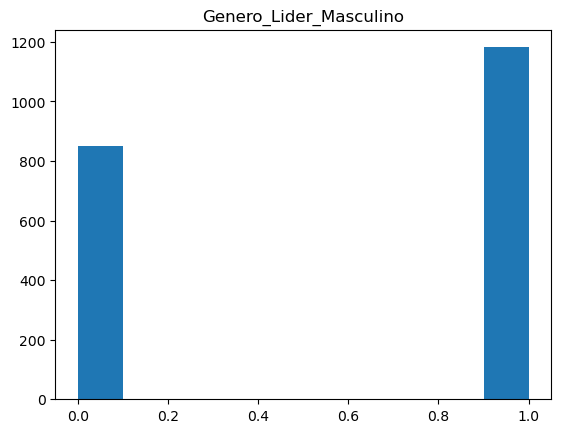

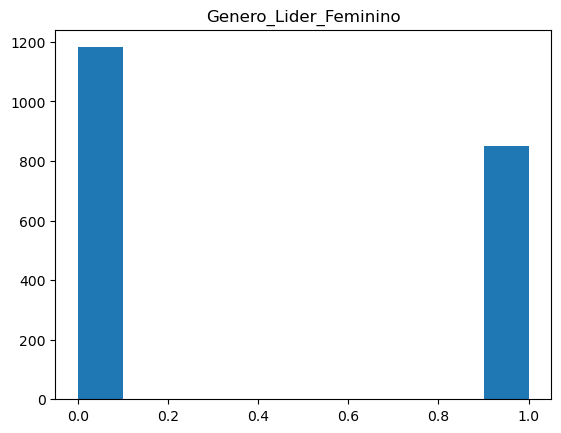

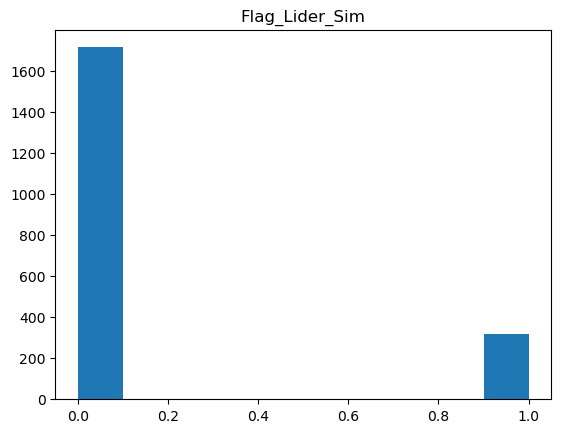

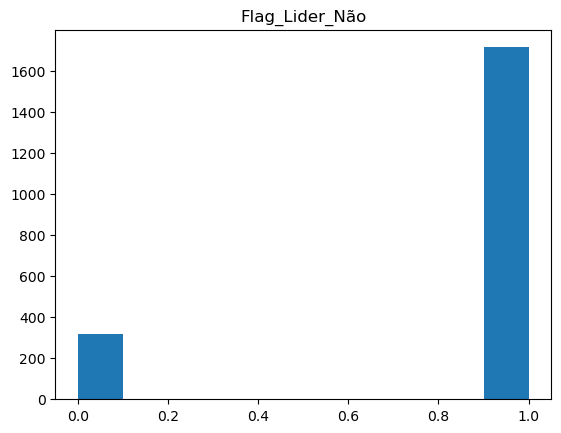

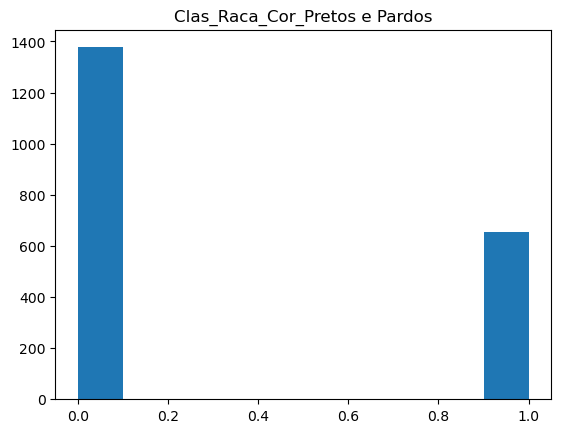

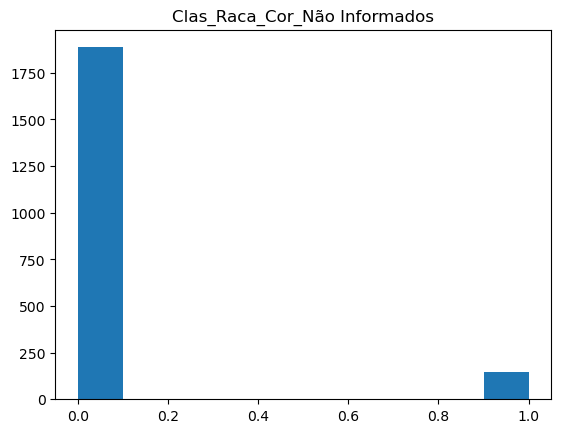

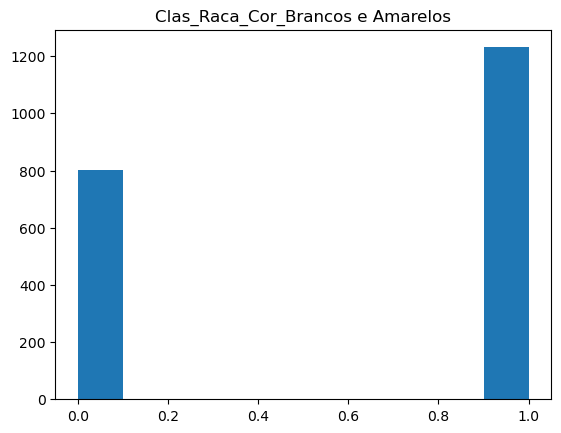

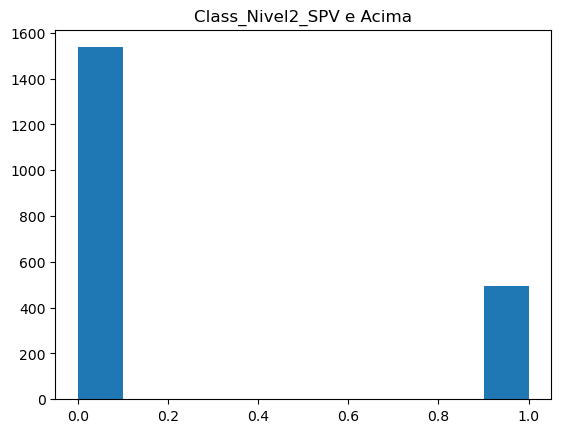

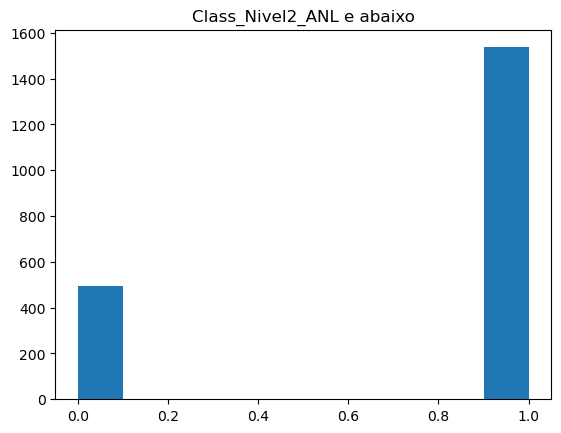

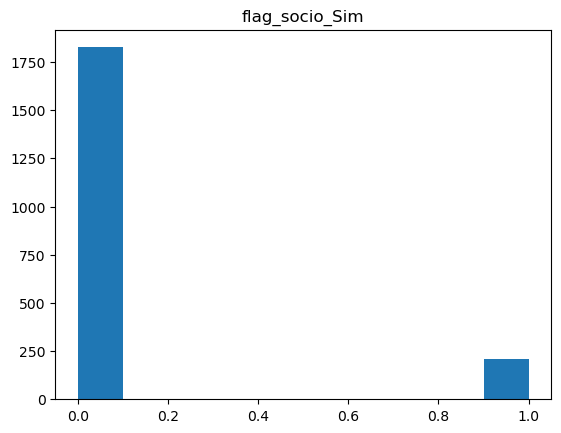

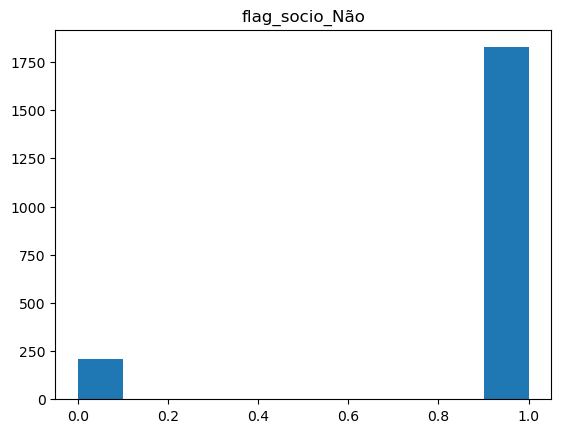

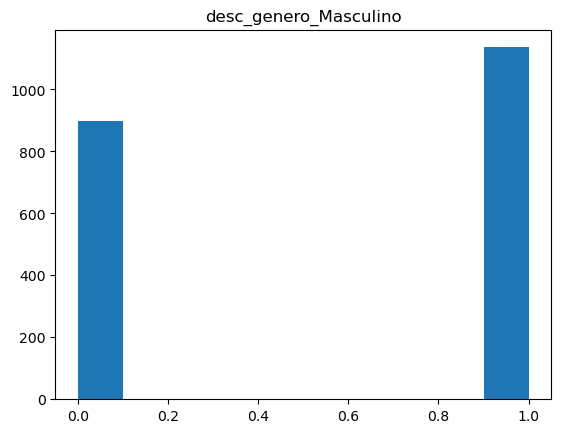

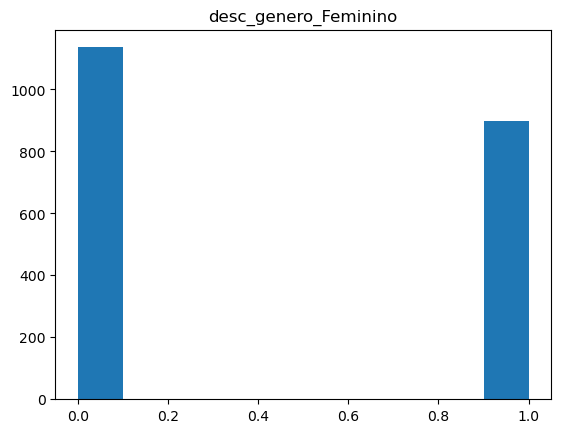

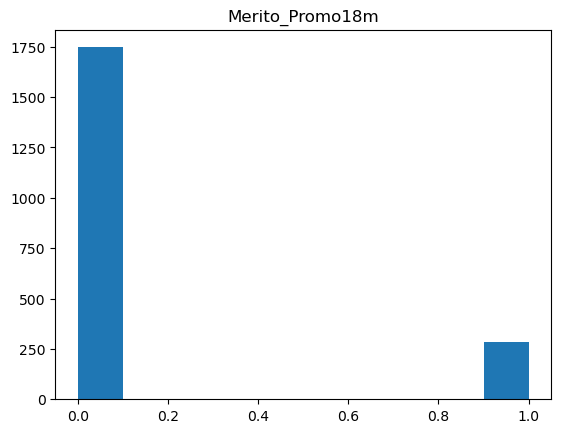

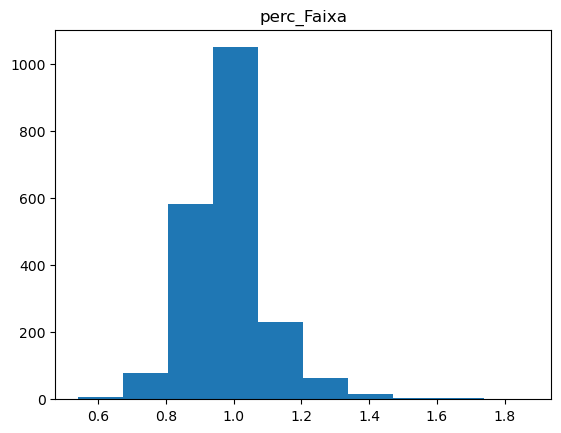

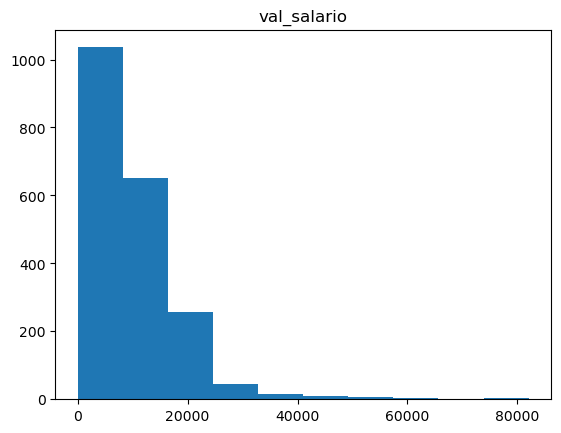

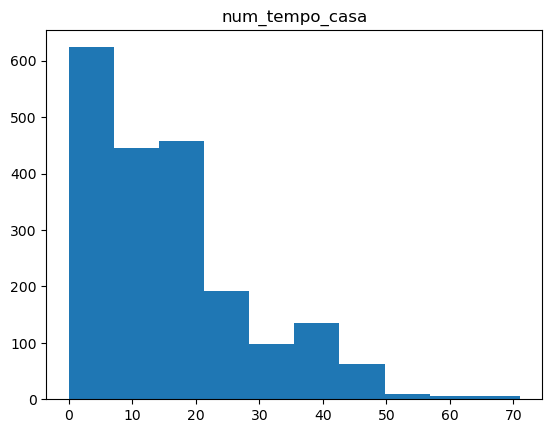

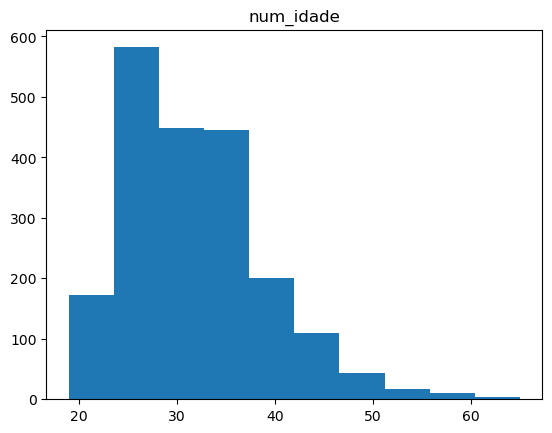

In [12]:
# Plotar gráficos
for variavel in variaveis:
    plt.hist(data[variavel])
    plt.title(variavel)
    plt.show()

In [13]:
# Usar algoritmos de aprendizado de máquina
X = data[variaveis]
y = data['Alta_Perfomance_Persona']
regressao = LinearRegression().fit(X, y)
kmeans = KMeans(n_clusters=2).fit(X)

In [14]:
# Validar os resultados
r2_score = regressao.score(X, y)
inertia = kmeans.inertia_

<AxesSubplot:>

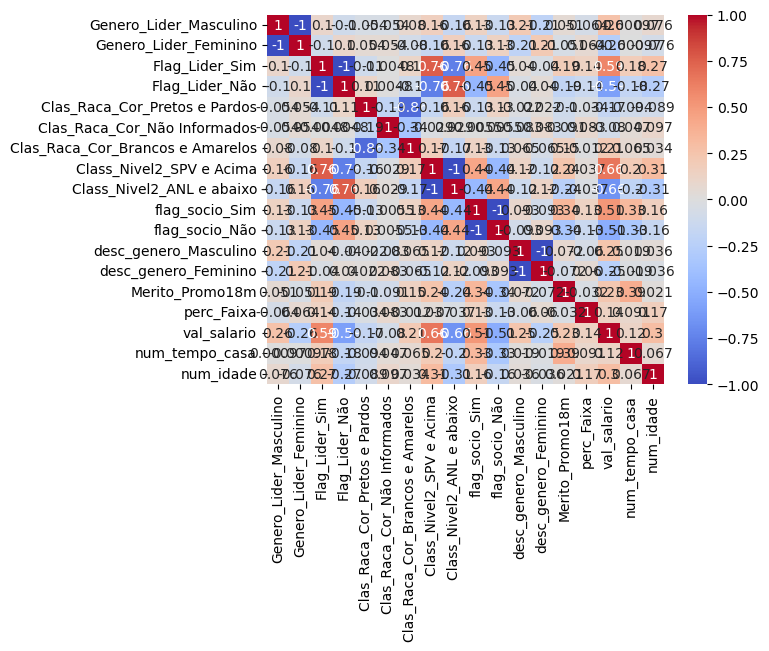

In [15]:
# Gerar o heatmap
corr = data[variaveis].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

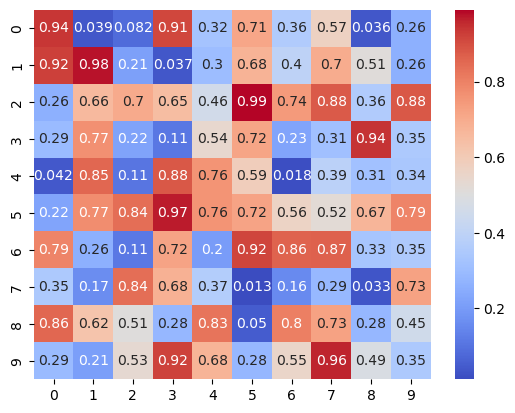

In [16]:
# Gerar matriz de dados aleatórios
matriz = np.random.rand(10, 10)
# Gerar heatmap
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.show()